Stability test at USDF
======================

- upper six nodes of Cassandra cluster are used for testing (sdfk8sk007-012)
- ZFS storage
- mpi mode, requesting 2 milan nodes in exclusive mode
- `fill_empty_fields=False`, meaning there is very little data stored
- `query_per_time_part=False`
- `query_per_spatial_part=True`
- `use_insert_id_skips_diaobjects = True`

After visit 208147 switched to `query_per_time_part=True`.


In [1]:
%matplotlib inline

from collections import defaultdict
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


In [2]:
data_files = [
    "data/DM-43467/apdb-usdf-cass13-upper-20240301T181744.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240302T101119.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240302T205913.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240303T093055.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240304T074036.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240304T221310.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240305T132233.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240306T120138.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240307T153137.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240311T104726.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240313T115834.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240314T073157.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240315T211030.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240318T094530.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240322T142248.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240323T222916.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240325T201926.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240327T152255.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240329T230507.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240331T212522.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240403T132536.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240404T112149.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240408T101312.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240411T112132.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240411T162016.csv.gz",
    "data/DM-43467/apdb-usdf-cass13-upper-20240415T080145.csv.gz",
]


In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]
df = pd.concat(frames)

In [4]:
# strip visits that did not measure read time
df = df[(df.index % 1000) < 100]

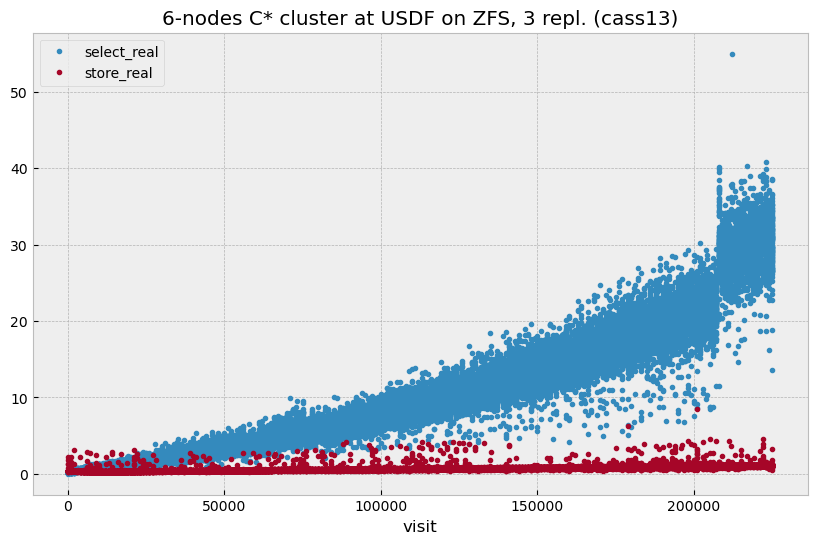

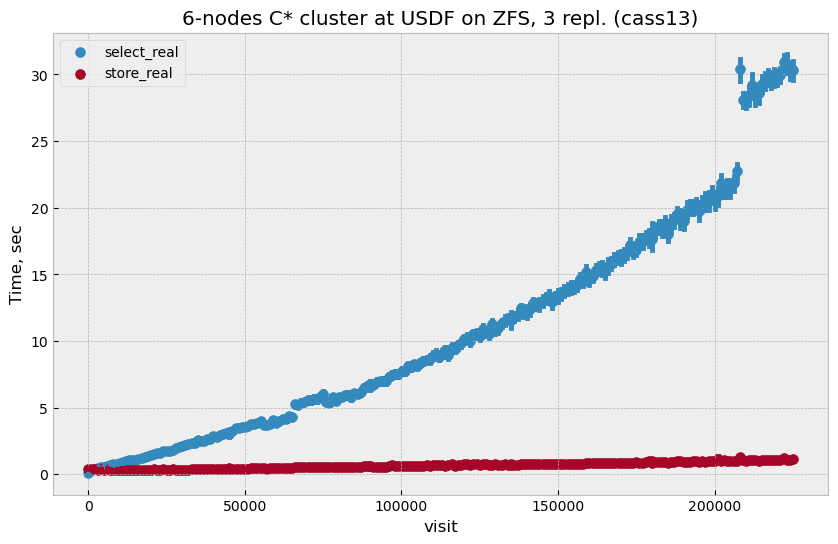

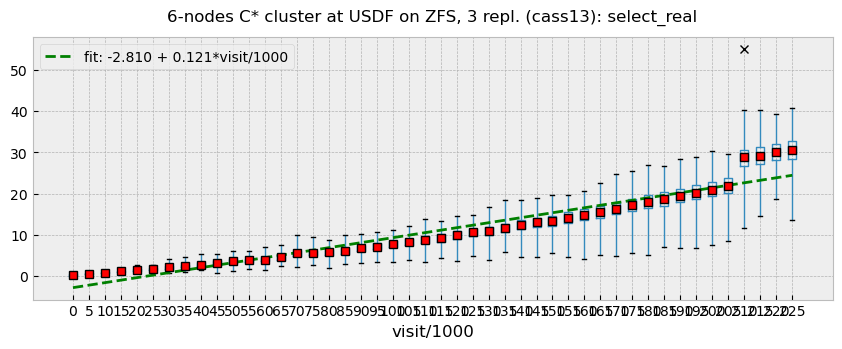

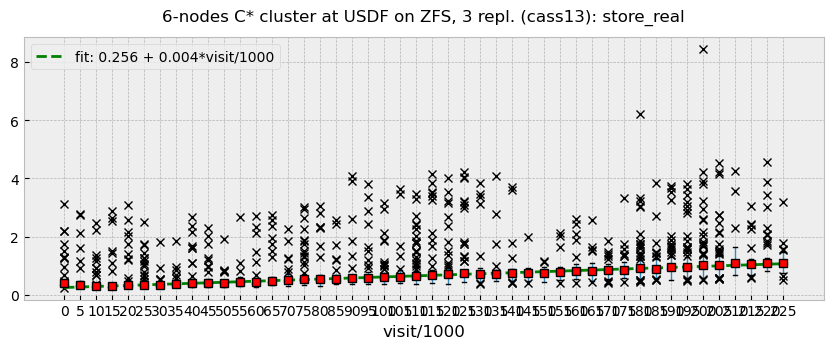

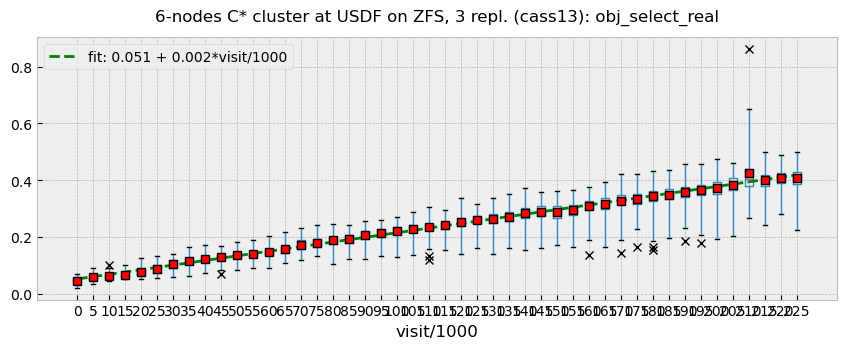

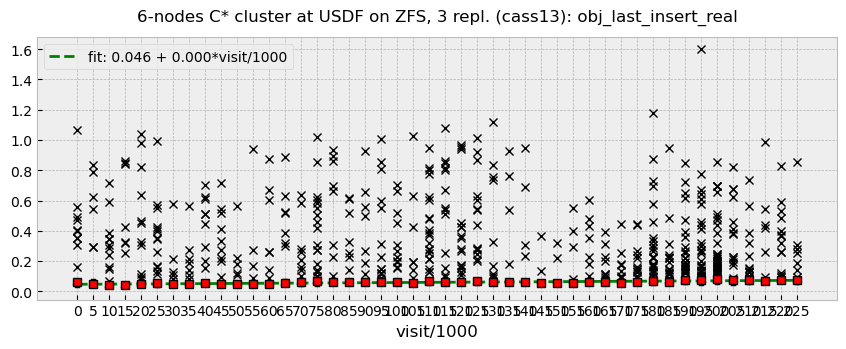

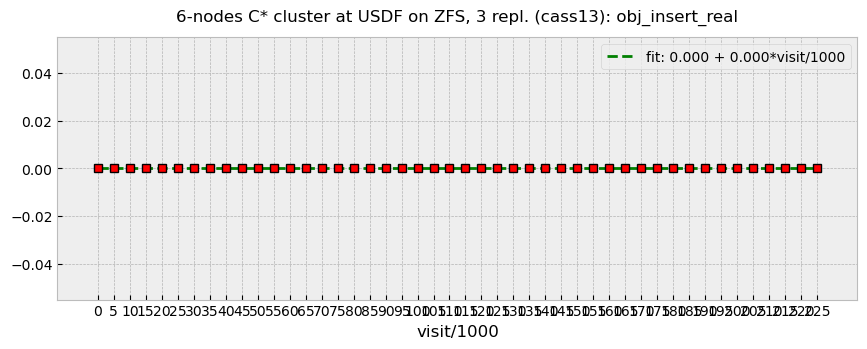

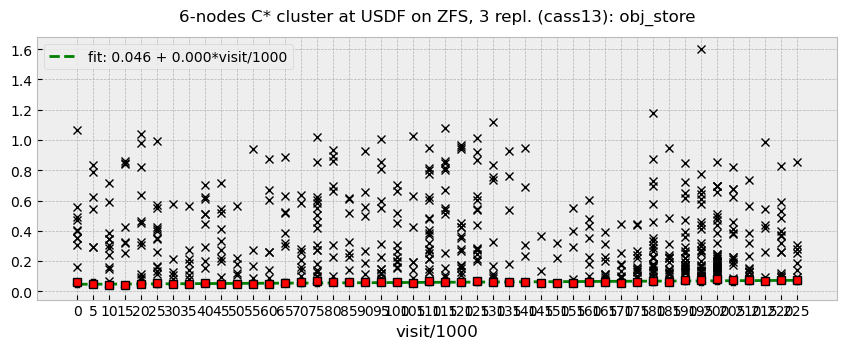

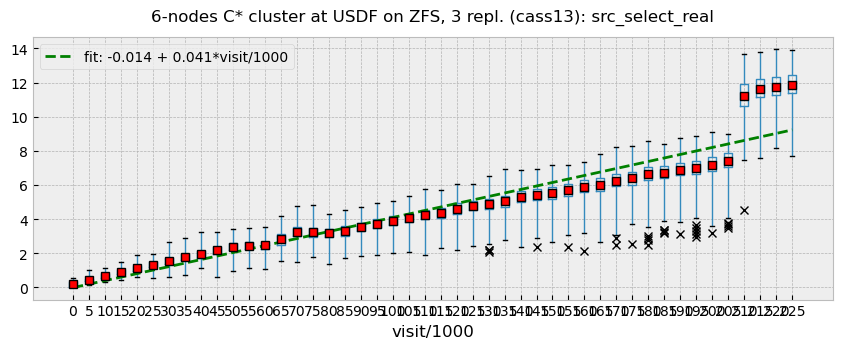

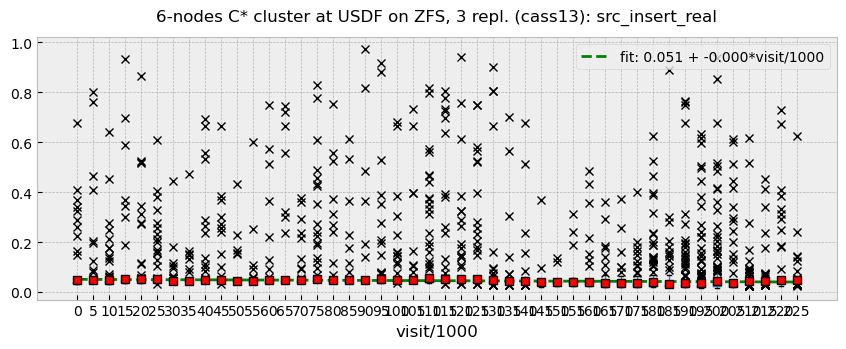

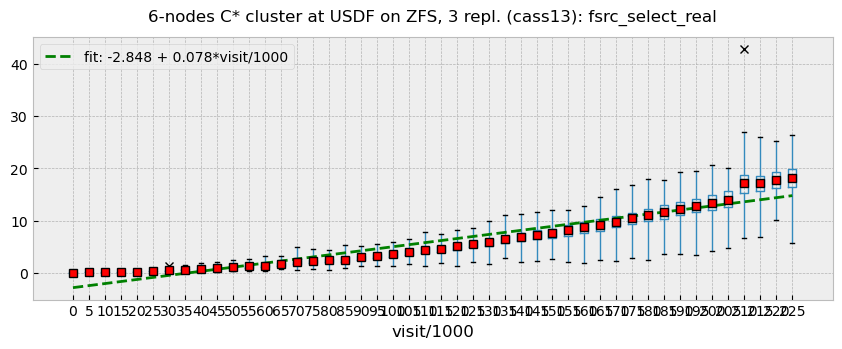

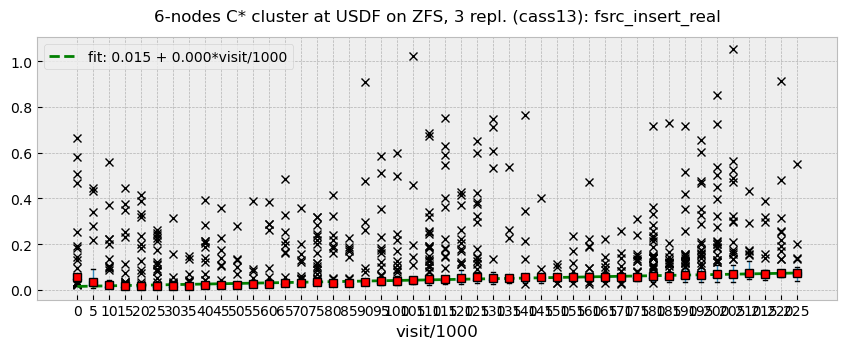

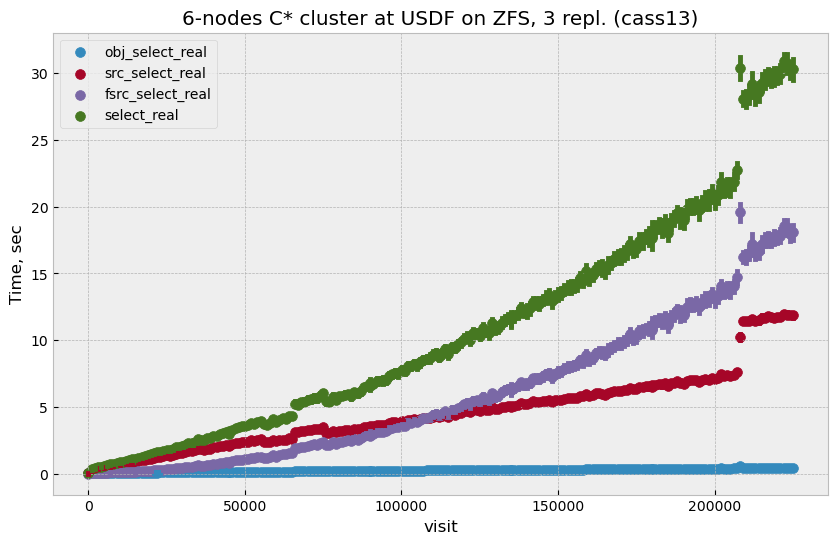

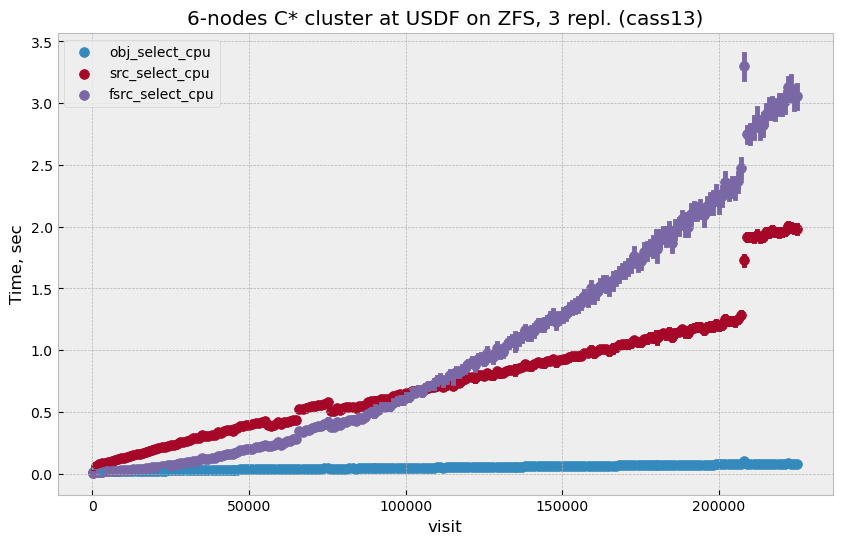

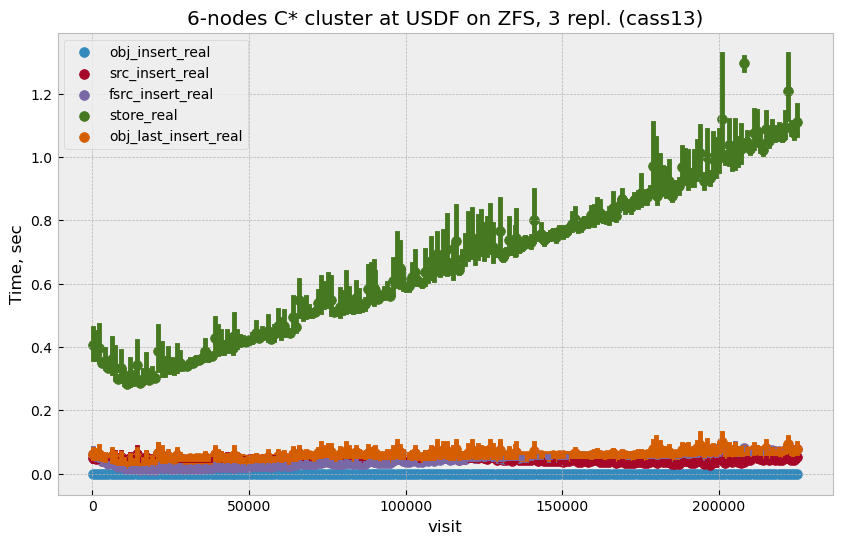

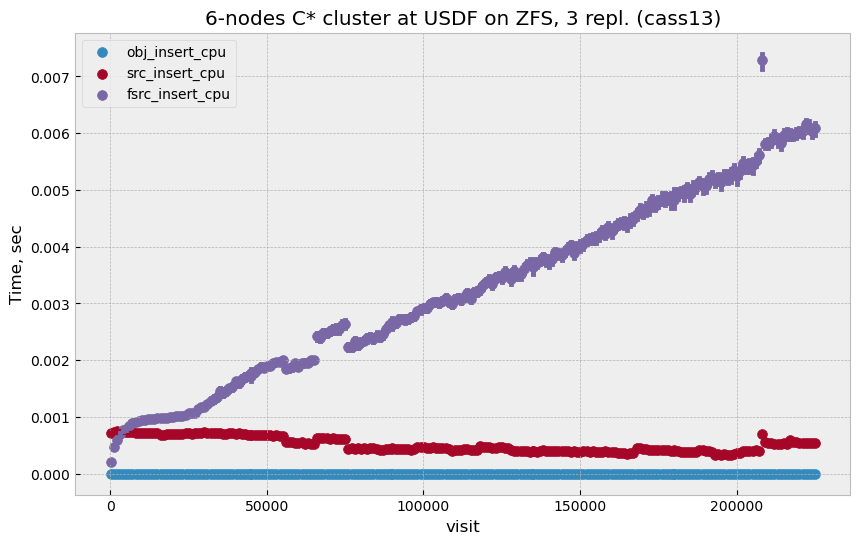

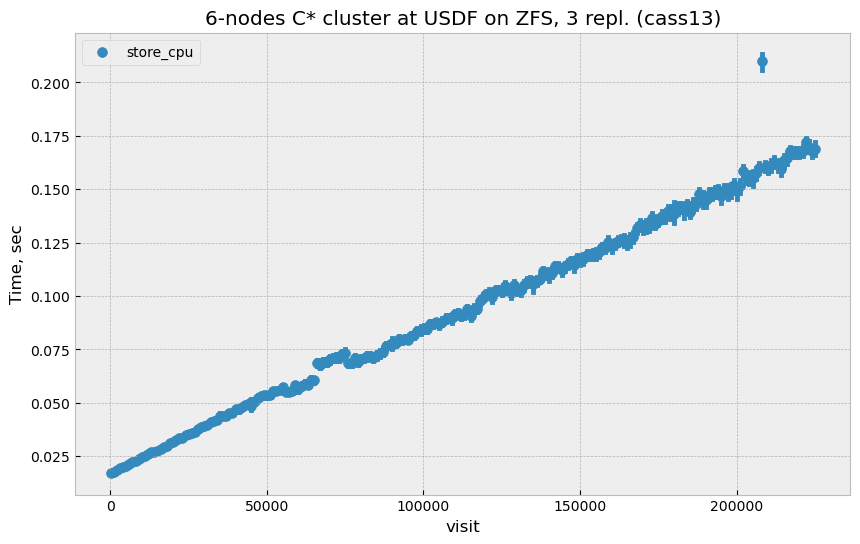

In [12]:
fit_modes = dict(
    store_real=None,
    obj_last_insert_real=None,
    src_insert_real=None,
    fsrc_insert_real=None,
    obj_insert_real=None,
    src_insert_cpu=None,
    fsrc_insert_cpu=None,
    obj_insert_cpu=None,
    store_cpu=None,
)

title = "6-nodes C* cluster at USDF on ZFS, 3 repl. (cass13)"
plots.do_plots_all(df, title, bin=5000, plots=all_plots, whis=whiskers, fit_mode=None, fit_nbins=230);